In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"C:\Users\heyro\OneDrive\Desktop\Projects\Analysis\Pizza.csv")

In [4]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.shape


(48620, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
df["order_time"] = df["order_time"].astype("string")
df[["hour","minute","second"]] = df["order_time"].str.split(":",expand=True)
df["hour"].value_counts().sort_index()

10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
9        4
Name: hour, dtype: Int64

In [11]:
#total sales

totalsales=df["total_price"].sum()
totalsales

817860.05

In [16]:
# lets analyse the data for days.

df['order_day'] = pd.to_datetime(df['order_date'], errors='coerce')

df["order_day"] = df["order_day"].dt.day_name()
df["order_day"].value_counts().sort_index()

Friday       8106
Monday       6369
Saturday     7355
Sunday       5917
Thursday     7323
Tuesday      6753
Wednesday    6797
Name: order_day, dtype: int64

In [18]:
px.histogram(df,x="order_day",color='pizza_category')

In [21]:
px.histogram(df,x="hour", color='pizza_category')

In [32]:
px.histogram(df,x="pizza_category",color="pizza_name")

In [83]:
#top 5 pizza

top5=df.groupby("pizza_name")["quantity"].count().sort_values(ascending=False)
top5

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [ ]:
spread1=top5.groupby([""])

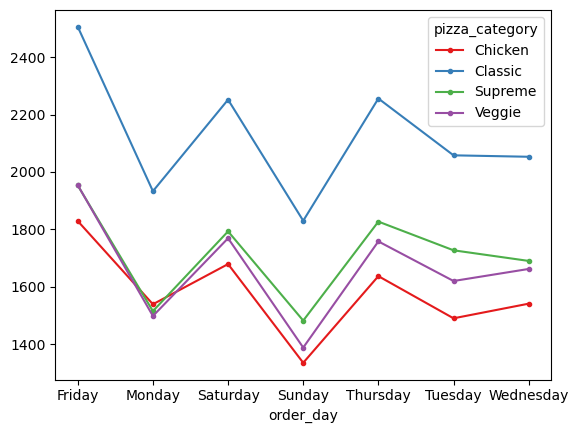

In [72]:
spread=df.groupby(["order_day","pizza_category"])["quantity"].sum().unstack()
spread=spread.plot(marker = ".")



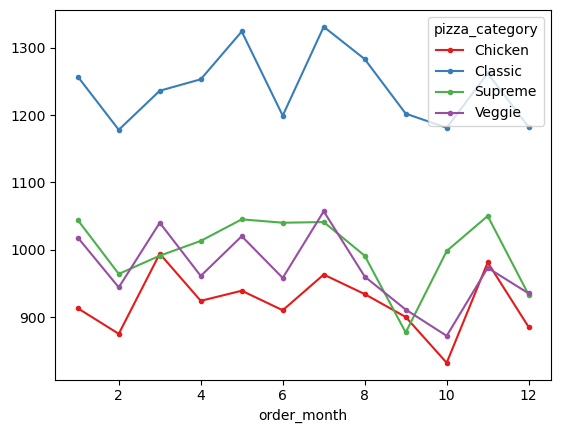

In [75]:
spread2=df.groupby(["order_month","pizza_category"])["quantity"].sum().unstack()
spread2=spread2.plot(marker = ".")

In [113]:
highest=df.loc[df['pizza_category'] == "Classic"]
highest

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,hour,minute,second,order_day,order_month
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,38,36,Thursday,1
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,57,40,Thursday,1
11,12,6,the_greek_s,1,1/1/2015,12:29:36,12.00,12.00,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,12,29,36,Thursday,1
14,15,9,classic_dlx_s,1,1/1/2015,12:52:01,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,12,52,01,Thursday,1
16,17,9,ital_cpcllo_l,1,1/1/2015,12:52:01,20.50,20.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza,12,52,01,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48600,48601,21343,pepperoni_l,1,12/31/2015,20:27:23,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,20,27,23,Thursday,12
48604,48605,21344,pepperoni_m,1,12/31/2015,20:43:46,12.50,12.50,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,20,43,46,Thursday,12
48605,48606,21345,classic_dlx_s,1,12/31/2015,20:44:43,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,20,44,43,Thursday,12
48607,48608,21346,big_meat_s,1,12/31/2015,20:51:07,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,20,51,07,Thursday,12


In [114]:
highest=highest.groupby("pizza_name")["quantity"].sum().sort_values(ascending=False)
highest=highest[0:3]
highest

pizza_name
The Classic Deluxe Pizza    2453
The Hawaiian Pizza          2422
The Pepperoni Pizza         2418
Name: quantity, dtype: int64

In [119]:
#analysing the lower sales category it, CHICKEN


lowest=df.loc[df['pizza_category'] == "Chicken"]
lowest=lowest.groupby("pizza_name")["quantity"].sum().sort_values(ascending=True)
lowest

pizza_name
The Chicken Pesto Pizza          973
The Chicken Alfredo Pizza        987
The Southwest Chicken Pizza     1917
The California Chicken Pizza    2370
The Thai Chicken Pizza          2371
The Barbecue Chicken Pizza      2432
Name: quantity, dtype: int64

In [30]:
#size of pizza

df.pizza_size.value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

In [26]:
px.histogram(df,x="pizza_size",color="pizza_category")